[IPython Notebook](intens_weighting.ipynb) |  [Python Script](intens_weighting.py)

Intensity Weighting
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:782: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


In [3]:
b.add_dataset('lc', times=np.linspace(0,3,101))

<ParameterSet: 12 parameters | kinds: lc, lc_dep>

In [4]:
b.add_dataset('mesh', times=[0])

<ParameterSet: 1 parameters>

Relevant Parameters 
-------------------------------

In [5]:
b['intens_weighting']

<Parameter: intens_weighting=energy | keys: description, choices, value, visible_if, copy_for>

In [6]:
print b['intens_weighting']

Parameter: intens_weighting@lc01@dataset
                       Qualifier: intens_weighting
                     Description: Whether passband intensities are weighted by energy of photons
                           Value: energy
                         Choices: energy, photon



Influence on Light Curves (fluxes)
---------------------------------------------

In [7]:
for teff_primary in [5000,7500,10000,12500,15000]:
    b['teff@primary'] = teff_primary
    b['teff@secondary'] = 0.9 * teff_primary
    
    for weighting in ['energy', 'photon']:
        b['intens_weighting'] = weighting
        b.run_compute(reflection_method='none', model='{}_{}'.format(teff_primary, weighting))

Thu, 22 Sep 2016 14:38 PARAMETERS   WARNING Object probably has a convective atm (teff=5000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Thu, 22 Sep 2016 14:38 PARAMETERS   WARNING Object probably has a convective atm (teff=5000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Thu, 22 Sep 2016 14:38 PARAMETERS   WARNING Object probably has a convective atm (teff=5000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Thu, 22 Sep 2016 14:38 BUNDLE       WARNING Object probably has a convective atm (teff=5000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Thu, 22 Sep 2016 14:38 PARAMETERS   WARNING Object probably has a convective atm (teff=5000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Thu, 22 Sep 2016 14:38 BUNDLE       WARNING Object probably has a convective atm (teff=5000K<6600K), for which gravb_bol=0.32 might be a better a

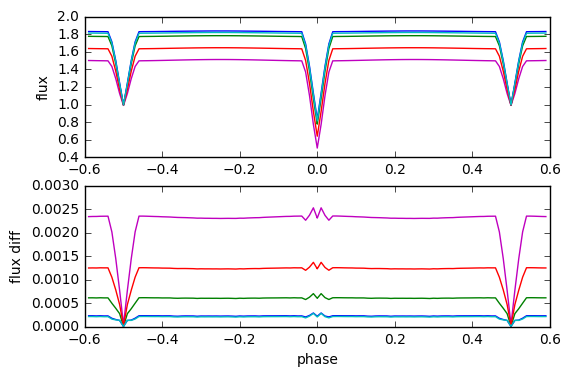

In [8]:
teff_colormap = {5000: 'm', 7500: 'r', 10000: 'g', 12500: 'c', 15000: 'b'}

fig = plt.figure()
ax1, ax2 = fig.add_subplot(211), fig.add_subplot(212)

for teff, color in teff_colormap.items():
    fluxes_energy = b.get_value('fluxes@{}_energy'.format(teff))
    fluxes_photon = b.get_value('fluxes@{}_photon'.format(teff))
    phases = b.to_phase('times@lc@dataset')
    
    # alias data from -0.6 to 0.6
    fluxes_energy = np.append(fluxes_energy, fluxes_energy[abs(phases) > 0.4])
    fluxes_photon = np.append(fluxes_photon, fluxes_photon[abs(phases) > 0.4])
    phases = np.append(phases, phases[abs(phases)>0.4]+1.0)
    phases[phases > 1.0] = phases[phases > 1.0] - 2.0
    
    sort = phases.argsort()
    phases = phases[sort]
    fluxes_energy = fluxes_energy[sort]
    fluxes_photon = fluxes_photon[sort]
    
    ax1.plot(phases, fluxes_energy, color=color)
    ax2.plot(phases, fluxes_photon-fluxes_energy, color=color)

lbl = ax1.set_xlabel('')
lbl = ax1.set_ylabel('flux')
lbl = ax2.set_xlabel('phase')
lbl = ax2.set_ylabel('flux diff')